In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [50]:
NYSE_Weather = pd.read_csv('../data/NYSE_Weather.csv')
NYC_no_outliers = pd.read_csv('../data/NYC_no_outliers.csv')
Monthly_NYC = pd.read_csv('../data/Monthly_averages.csv')

In [52]:
NYSE_Weather.head()

,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,HOS_Numeric,temp,humidity,precip,preciptype,snow,windspeed,cloudcover,visibility,sunrise,sunset,conditions,description
0,1985-01-03,1005.030029,1005.030029,0.0,-0.398390,0 days 09:20:42,9.345000,0.3,54.6,0.000,none,0.0,26.2,100.0,25.2,07:20:26,16:41:08,Overcast,Cloudy skies throughout the day.
1,1985-01-04,1000.270020,1000.270020,0.0,-0.473619,0 days 09:21:36,9.360000,-1.1,58.1,1.247,"rain,snow",0.0,23.0,99.1,18.9,07:20:26,16:42:02,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...
2,1985-01-07,1003.340027,1003.340027,0.0,0.306918,0 days 09:24:39,9.410833,2.9,78.3,0.000,none,0.0,22.1,99.3,13.3,07:20:15,16:44:54,Overcast,Cloudy skies throughout the day.
3,1985-01-08,1002.500000,1002.500000,0.0,-0.083723,0 days 09:25:46,9.429444,-1.5,57.0,0.000,none,0.0,46.8,32.1,29.5,07:20:07,16:45:53,Partially cloudy,Partly cloudy throughout the day.
4,1985-01-09,1009.159973,1009.159973,0.0,0.664336,0 days 09:26:59,9.449722,-7.9,51.4,0.000,none,0.0,40.8,0.9,34.5,07:19:56,16:46:55,Clear,Clear conditions throughout the day.


In [57]:
#One-Hot Encode the conditions column

# one-hot encoding each individual condition in a seprate dataframe which will then be added to the original
one_hot_encoded_data = pd.DataFrame()

# Split the combined condition into a list of individual conditions
conditions = NYSE_Weather['conditions'].str.split(', ')

for index, condition_list in enumerate(conditions):
    for condition in condition_list:
        # Create binary columns for each condition
        one_hot_encoded_data.at[index, condition.strip()] = 1

# Fill NaN values with 0
one_hot_encoded_data = one_hot_encoded_data.fillna(0).astype(int)

# Concatenate the one-hot encoded data with original NYSE_Weather df
NYSE_Weather = pd.concat([NYSE_Weather, one_hot_encoded_data], axis=1)


In [43]:
NYSE_Weather.head()


,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,HOS_Numeric,temp,humidity,precip,...,sunset,conditions,description,Overcast,Snow,Rain,Partially cloudy,Clear,Freezing Drizzle/Freezing Rain,Ice
0,1985-01-03,1005.030029,1005.030029,0.0,-0.398390,0 days 09:20:42,9.345000,0.3,54.6,0.000,...,16:41:08,Overcast,Cloudy skies throughout the day.,1,0,0,0,0,0,0
1,1985-01-04,1000.270020,1000.270020,0.0,-0.473619,0 days 09:21:36,9.360000,-1.1,58.1,1.247,...,16:42:02,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,1,1,1,0,0,0,0
2,1985-01-07,1003.340027,1003.340027,0.0,0.306918,0 days 09:24:39,9.410833,2.9,78.3,0.000,...,16:44:54,Overcast,Cloudy skies throughout the day.,1,0,0,0,0,0,0
3,1985-01-08,1002.500000,1002.500000,0.0,-0.083723,0 days 09:25:46,9.429444,-1.5,57.0,0.000,...,16:45:53,Partially cloudy,Partly cloudy throughout the day.,0,0,0,1,0,0,0
4,1985-01-09,1009.159973,1009.159973,0.0,0.664336,0 days 09:26:59,9.449722,-7.9,51.4,0.000,...,16:46:55,Clear,Clear conditions throughout the day.,0,0,0,0,1,0,0


### Linear Regression (Monthly Returns vs Sunlight Hours)

In [44]:
Monthly_NYC.head()

,Avg_Returns,Avg_Returns_N/O,Hours_of_Sunlight(Time),Hours_of_Sunlight(Numeric)
0,0.042002,0.087407,0 days 09:39:17.951371571,9.654986
1,0.019312,0.089709,0 days 10:39:37.815261044,10.660504
2,0.042535,0.076085,0 days 11:57:43.722482435,11.962145
3,0.081893,0.068025,0 days 13:19:36.336645962,13.326760
4,0.043694,0.039235,0 days 14:26:51.105454545,14.447529


In [45]:
import statsmodels.api as sm
y = Monthly_NYC['Avg_Returns_N/O']
x= Monthly_NYC['Hours_of_Sunlight(Numeric)']

x = sm.add_constant(x) #adds a constant/intercept for the regression

model = sm.OLS(y, x)
regression = model.fit()

In [46]:
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg_Returns_N/O   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     6.463
Date:                Wed, 29 Nov 2023   Prob (F-statistic):             0.0293
Time:                        22:36:22   Log-Likelihood:                 28.333
No. Observations:                  12   AIC:                            -52.67
Df Residuals:                      10   BIC:                            -51.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

c:\Users\l3onw\anaconda3\envs\LHL_env\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Axes: xlabel='Hours_of_Sunlight(Numeric)', ylabel='Avg_Returns_N/O'>

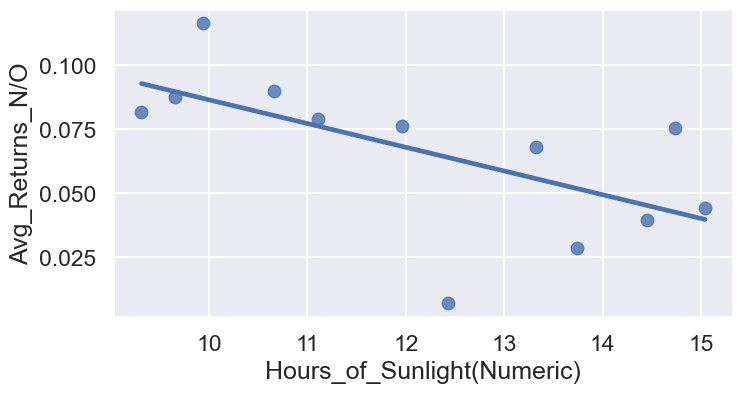

In [47]:
sns.set_theme(style = 'darkgrid', context = 'talk')

plt.figure(figsize=(8,4))
sns.regplot(x=Monthly_NYC['Hours_of_Sunlight(Numeric)'], y = Monthly_NYC['Avg_Returns_N/O'], ci=None)

### Kmeans Clustering

Cluster different days based on weather conditions to distinguish which types of days have what type of impact on market returns

In [61]:
NYSE_Weather.head()

,Date,Open,Close,Volume,Returns,Hours_of_Sunlight,HOS_Numeric,temp,humidity,precip,...,sunset,conditions,description,Overcast,Snow,Rain,Partially cloudy,Clear,Freezing Drizzle/Freezing Rain,Ice
0,1985-01-03,1005.030029,1005.030029,0.0,-0.398390,0 days 09:20:42,9.345000,0.3,54.6,0.000,...,16:41:08,Overcast,Cloudy skies throughout the day.,1,0,0,0,0,0,0
1,1985-01-04,1000.270020,1000.270020,0.0,-0.473619,0 days 09:21:36,9.360000,-1.1,58.1,1.247,...,16:42:02,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,1,1,1,0,0,0,0
2,1985-01-07,1003.340027,1003.340027,0.0,0.306918,0 days 09:24:39,9.410833,2.9,78.3,0.000,...,16:44:54,Overcast,Cloudy skies throughout the day.,1,0,0,0,0,0,0
3,1985-01-08,1002.500000,1002.500000,0.0,-0.083723,0 days 09:25:46,9.429444,-1.5,57.0,0.000,...,16:45:53,Partially cloudy,Partly cloudy throughout the day.,0,0,0,1,0,0,0
4,1985-01-09,1009.159973,1009.159973,0.0,0.664336,0 days 09:26:59,9.449722,-7.9,51.4,0.000,...,16:46:55,Clear,Clear conditions throughout the day.,0,0,0,0,1,0,0


In [60]:
NYSE_Weather[['snow','Snow']][NYSE_Weather['snow'] != 0]

,snow,Snow
9338,0.9,1
9344,1.4,1
9349,1.5,1
9350,0.4,1
9363,1.8,0
9371,3.0,1
9563,1.4,1
9572,0.3,1
9590,0.1,0
9592,0.2,1


In [63]:
# Create seperate dataframe with only the numeric weather columns
"""seeing how the it clusters the weather data"""
#HOS_Numeric temp precip humidity windspeed	cloudcover	visibility
#pd.concat([NYSE_Weather, one_hot_encoded_data], axis=1)

Weather_kmeans = NYSE_Weather[['HOS_Numeric','temp','precip','humidity','windspeed','cloudcover','visibility']]

x=Weather_kmeans


Elbow Method to find optimal number of clusters

In [64]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

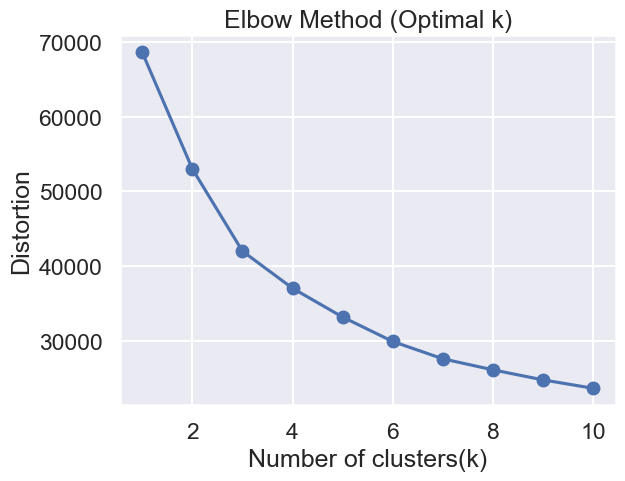

In [65]:
distortions = []

# set max number of potential clusters to 10
for k in range(1, 11): 
    km = KMeans(n_clusters= k, n_init=10, random_state=0)
    km.fit(x_scaled)
    distortions.append(km.inertia_)
        
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Distortion')
plt.title('Elbow Method (Optimal k)')
plt.show() 

Visible elbow at k=3

In [66]:
#initialize kmeans clustering
k = 3
kmeans = KMeans(n_clusters= k, random_state=0, n_init= 10)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [72]:
#Checking the clusters for each value
kmeans.fit_predict(x_scaled)


array([2, 2, 1, ..., 2, 2, 1])

In [78]:
# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add cluster labers to DFs
Weather_kmeans['ClusterKM'] = cluster_labels
NYSE_Weather['ClusterKM'] = cluster_labels

# Visualize the clusters using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)


C:\Users\l3onw\AppData\Local\Temp\ipykernel_25384\573801070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weather_kmeans['ClusterKM'] = cluster_labels


In [74]:
#number of results per cluster
Weather_kmeans['ClusterKM'].value_counts()

ClusterKM
0    3731
2    3443
1    2628
Name: count, dtype: int64

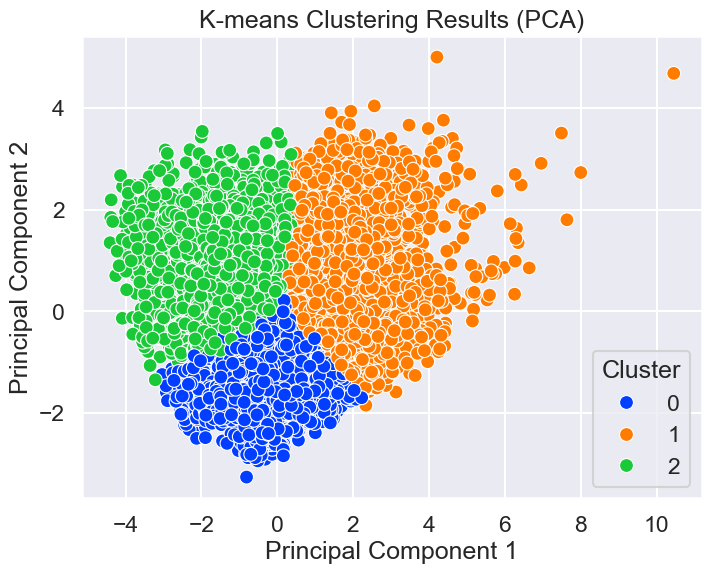

In [75]:
# Create a scatter plot of the clusters in the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=cluster_labels, palette='bright', s=100)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results (PCA)')
plt.legend(title='Cluster')
plt.show()

In [85]:
#Means of each cluster, organized by features
Weather_kmeans.groupby('ClusterKM').mean()

,HOS_Numeric,temp,precip,humidity,windspeed,cloudcover,visibility
ClusterKM,,,,,,,
0,13.885708,21.466845,0.676833,60.669928,20.613535,42.338971,16.466282
1,12.022732,12.693493,9.234744,81.667314,23.860654,88.394216,11.650038
2,10.592216,4.812170,0.381511,53.677781,25.642782,44.356085,19.029712


- Cluster1 :
    - Warmer, sunnier days (more HOS)
- Cluster2 : 
    - Cloudy days, most commonly with precipitation
- Cluster3 : 
    - Cold days with fewer HOS

In [86]:
#seeing how returns vary based on clusters
NYSE_Weather.groupby('ClusterKM')['Returns'].mean()

ClusterKM
0    0.000759
1    0.029822
2    0.074166
Name: Returns, dtype: float64

- The clusters with fewer hours of sunlight showed greater on average returns
    - These cluster presumably coincide with winter/fall
- Clusters with more hours of sunlight showed significantly lower returns
    - These cluster presumably coincide with spring/summer

 - <u>Results align with Previous Findings</u>
    - Warmer days => Likely Spring/Summer => More sun => lower returns
    - Cloudier days => Less sun => higher returns  
    - Cold days => Likely Fall/Winter => Less sun => Even higher returns